Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.8        |
|    ep_rew_mean          | 130         |
| time/                   |             |
|    fps                  | 554         |
|    iterations           | 10          |
|    time_elapsed         | 36          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.008727435 |
|    clip_fraction        | 0.0584      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | 0.157       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.45e+03    |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0165     |
|    value_loss           | 1.08e+04    |
-----------------------------------------
------------------------

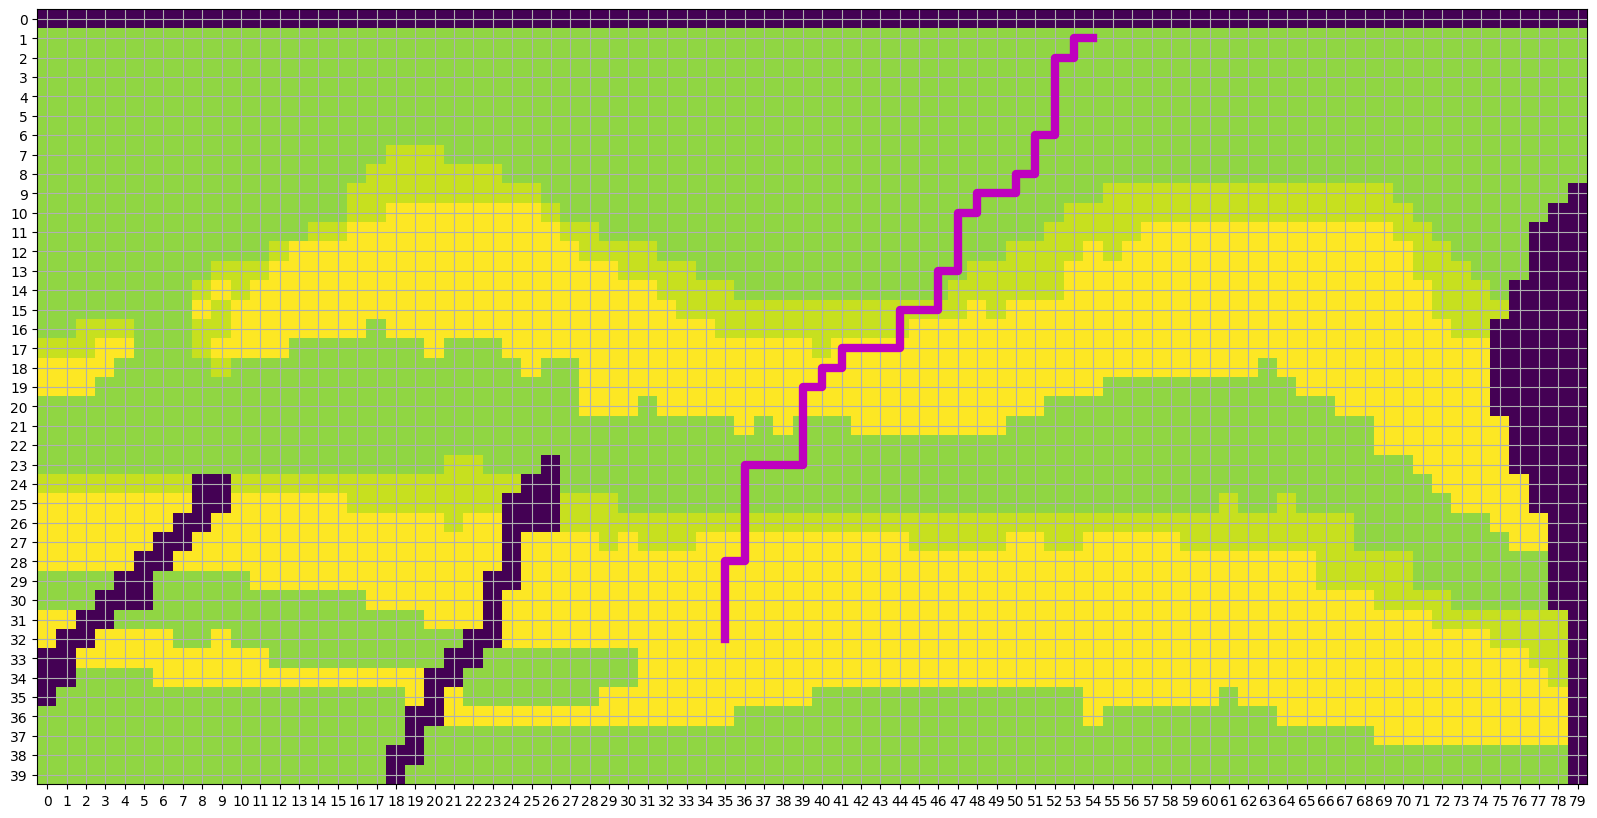

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from wildcatter.environment import SimpleDriller

env_config = dict(model_path=r"data/environment_test.csv", available_pipe=50, delim=",")

env = SimpleDriller(env_config)

from stable_baselines3 import PPO

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=50_000, log_interval=10)


episodes = 1
for episode in range(1, episodes + 1):
    print("Beginning Drill Campaign:", episode)
    state = env.reset()
    done = False
    score = 0

    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.step(action)
        score += reward

# This comes in as [[row1, col1], ..., [rowN, colN]]
# Once we unpack it its z, then x.
traj_z, traj_x = np.asarray(env.trajectory).T

plt.figure(figsize=(20, 20))
plt.imshow(env.model, vmin=-10, vmax=2)
plt.plot(traj_x, traj_z, "-", c="m", linewidth=6)
plt.xticks(np.arange(0, 80, 1.0))
plt.yticks(np.arange(0, 40, 1.0))
plt.xlim([-0.5, 79.5])
plt.ylim([39.5, -0.5])
plt.grid()

Multidriller